In [15]:
"""
Name: Lauren Nguyen
Course: CPSC 222
Assignment: Final Project
Date: 12/3/2022
Description: Final Data Science project using wordle data to compute EDA, 
            statistics testing, and machine learning
"""
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\dzuy\\Desktop\\CPSC222\\project\\utils.py'>

## Data Description
My data that I will be using in this project comes from the internet game wordle. I have been tracking my daily attempts along with these attributes:
* Amount of tries(Tries)
* Date(Date)
* The word(Word)
* The time completed(Time)
* If I got the word(Got it)
## Loading the Data
First we load the data from a csv file into a pandas dataframe

In [16]:
uncleaned_df = utils.read_file("wordle_uncleaned.csv")
print(uncleaned_df.head())

      Date  Tries   Word      Time Got it
0  9/14/22    5.0  Thyme   8:58 AM    Yes
1  9/15/22    4.0  Doubt   9:09 AM    Yes
2  9/16/22    6.0  Parer   1:11 PM    Yes
3  9/17/22    NaN    NaN       NaN    NaN
4  9/18/22    5.0  Stick  11:33 AM    Yes


## Cleaning the data
Next, we need to clean the data up a little. There are some days of wordle that I had missed so I need to delete the rows where there is no data present. Then write to a new csv file called **"cleaned_wordle.csv"**

In [17]:
cleaned_df = utils.delete_missing_data(uncleaned_df)
cleaned_df.to_csv("cleaned_wordle.csv")

## Visualizing Some Data
Plotting a line chart with the y-axis being the days and x-axis being the amount of tries

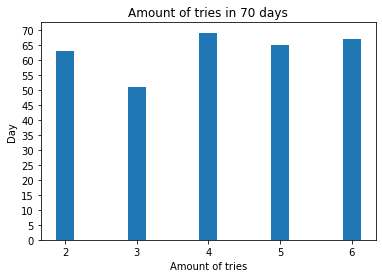

In [18]:
utils.plot_data(cleaned_df.loc[:,"Tries"], cleaned_df.index)

## Agreggating Data
For this, we will be computing statistics on our dataset, These calculations will include:
* Total days of Wordle completed
* Total Wordles completed in the morning
* Total Wordles completed in the night
* Most common amount of tries
* Average amount of tries
* Standard deviation of tries
* Average tries in the morning
* Standard deviation of tries in the morning
* Average tries in the night
* Standard deviation of tries in the night

Formulas to be used:  
Average: $\frac{1}{n} \sum_{i=i}^{n} x_{i}$  
Standard Deviation: $\sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$  
Mode: l + h($\frac{f_{m}-f_{l}}{2f_{m}-f_{l}-f_{2}}$)


In [19]:
stats_list = utils.computed_statistics(cleaned_df)
statistics_headers = ["Total days of Wordle completed", "Total Wordles completed in the morning", "Total Wordles completed in the night", "Most common amount of tries"
                    , "Average amount of tries", "Standard deviation of tries", "Average tries in the morning", "Standard deviation of tries in the morning", 
                    "Average tries in the night", "Standard deviation of tries in the night"]
stats_series = pd.Series(stats_list, index= statistics_headers)
print(stats_series)

Total days of Wordle completed                70.000000
Total Wordles completed in the morning        50.000000
Total Wordles completed in the night          21.000000
Most common amount of tries                    5.000000
Average amount of tries                        4.800000
Standard deviation of tries                    1.077033
Average tries in the morning                   4.720000
Standard deviation of tries in the morning     1.149609
Average tries in the night                     4.952381
Standard deviation of tries in the night       0.843812
dtype: float64


## Hypothesis Testing: One tailed two sample independent t-test
Hypothesis: Is the mean wordle score in the night greater than the mean wordle score in the morning?

1. Identifying the null($H_{0}$) and alternative hypothesis($H_{1}$)
    * $H_{0}$: $\mu_n \le \mu_m$
    * $H_{1}$: $\mu_n > \mu_m$
1. Select Level of significance
    * Our level of significance will be 0.05
1. Select the appropiate test statistic
    * t-computed = $\frac{\overline{X_{1}} - \overline{X_{2}}}{\sqrt{{S_{p}}^2(\frac{1}{n_1} + \frac{1}{n_2})}}$
    * ${S_{p}}^2$ = $\frac{(n_1 - 1){S_1}^2 + (n_2 - 1){S_2}^2}{n_1 + n_2 - 2}$
1. Formulate the decision rule
    * degrees of freedom = 69
    * t-critical = 1.671
    * If t-computed is > 1.671 then reject $H_{0}$
    * if t-computed is < 1.671 then accept $H_{0}$
1. Make a decision
    * t-computed: 0.74
    * Since t-computed is < 1.671, accept $H_{0}$


**End Result**: On a signifigance level of 0.05, we can conclude that the average Wordle score in the night is greater then the average Wordle score in the morning


In [20]:
morning_df, night_df = utils.seperate_morning_night(cleaned_df)
n_n = len(night_df)
X_bar1 = night_df["Tries"].mean()
s1 = np.std(night_df["Tries"], ddof=1)
n_m = len(morning_df)
X_bar2 = morning_df["Tries"].mean()
s2 = np.std(morning_df["Tries"], ddof=1)

df = (n_m + n_n) - 2
print("DF:", df)

# testing with scipy
alpha = 0.05
t, pval = stats.ttest_ind_from_stats(X_bar1, s1, n_n, X_bar2, s2, n_n)
pval /= 2
print("t-computed:",t, "P-Value:", pval)
if pval < alpha:
    print("reject H0")
else:
    print("Accept H0")


4.9523809523809526 4.72
DF: 69
t-computed: 0.7355205360031276 P-Value: 0.23315684263938186
Accept H0
